# Я художник, я так вижу, визуализация данных в питоне

# I. Numpy

### Импортируйте NumPy

In [1]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [2]:
arr = np.zeros(10)
arr[4] = 1
arr_2d = arr.reshape(2, 5)  # Пример: reshape в 2x5
print(arr_2d)


[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [3]:
arr = np.arange(10, 50)
arr_reversed = arr[::-1]
even_elements = arr_reversed[arr_reversed % 2 == 0]
print(even_elements)


[48 46 44 42 40 38 36 34 32 30 28 26 24 22 20 18 16 14 12 10]


### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [4]:
arr_3x3 = np.arange(9).reshape(3, 3)
print(arr_3x3)


[[0 1 2]
 [3 4 5]
 [6 7 8]]


### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [5]:
import numpy as np

arr = np.random.rand(4, 3, 2)
print("Min:", arr.min())
print("Max:", arr.max())


Min: 0.18254205191025363
Max: 0.9690685037431108


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [6]:
A = np.random.randint(0, 10, size=(6, 4))
B = np.random.randint(0, 10, size=(4, 3))

result = np.matmul(A, B)
print("Result of A @ B:")
print(result)


Result of A @ B:
[[ 97  51  38]
 [107  54  47]
 [112  58  41]
 [ 78  45  61]
 [ 60  33  30]
 [ 84  55  51]]


### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [7]:
arr = np.random.rand(7, 7)
mean = arr.mean()
std = arr.std()

normalized = (arr - mean) / std

print("Mean:", mean)
print("Std:", std)
print("Normalized array:")
print(normalized)


Mean: 0.5060464513164581
Std: 0.28735703766919174
Normalized array:
[[-1.58741873 -0.05175044 -0.17676217 -0.97629234  0.7075638   0.86062913
  -0.47219399]
 [ 0.50174733  0.33198496  0.37985513 -1.7465509  -1.37448903  1.46786547
  -0.83484374]
 [-0.29255441 -0.56777188 -0.9189763  -1.63364412  0.04615288  1.44116654
  -0.39497241]
 [-0.14366818  1.51602789  1.36705487 -1.22671452  0.43350827  0.19699095
   0.56108822]
 [-1.56494253 -0.73968096  1.1193525   0.16431682  1.06578857 -0.76480439
  -0.13768483]
 [-0.23633177 -1.11612193  1.53780843  0.52589125  1.45034744  1.19043808
   0.78938078]
 [ 1.71519928  1.09726816 -1.57659892 -0.46279509 -1.42388334 -0.4494496
   0.40346976]]


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [12]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Defaulting to user installation because normal site-packages is not writeable


### Загрузите датасет Tips из набора датасетов seaborn

In [13]:
tips = sns.load_dataset("tips")


### Посмотрите на первые 5 строчек

In [14]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [15]:
tips.shape  # вернёт кортеж (rows, columns)


(244, 7)

### Проверьте есть ли пропуски в данных

In [16]:
tips.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

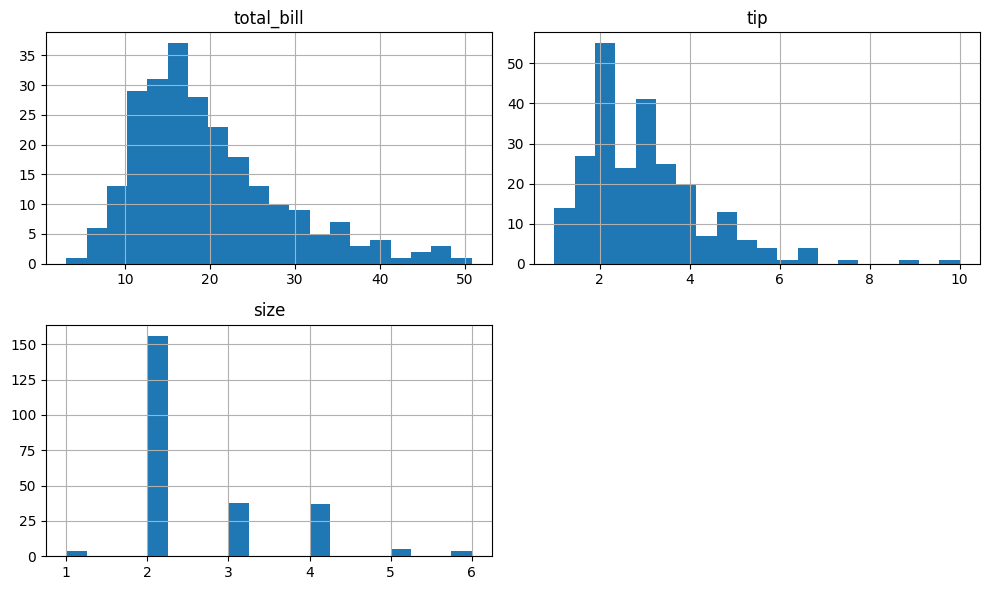

In [17]:
tips.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()


### Найдите максимальное значение 'total_bill'

In [18]:
tips['total_bill'].max()


50.81

### Найдите количество курящих людей

In [19]:
tips['smoker'].value_counts()


smoker
No     151
Yes     93
Name: count, dtype: int64

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [20]:
tips.groupby('day')['total_bill'].mean()


/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_90950/983894002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['total_bill'].mean()


day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [21]:
median_total = tips['total_bill'].median()
filtered = tips[tips['total_bill'] > median_total]
filtered.groupby('sex')['tip'].mean()


/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_90950/2293735955.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered.groupby('sex')['tip'].mean()


sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [22]:
tips['smoker_binary'] = tips['smoker'].map({'No': 0, 'Yes': 1})
tips[['smoker', 'smoker_binary']].head()


,smoker,smoker_binary
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

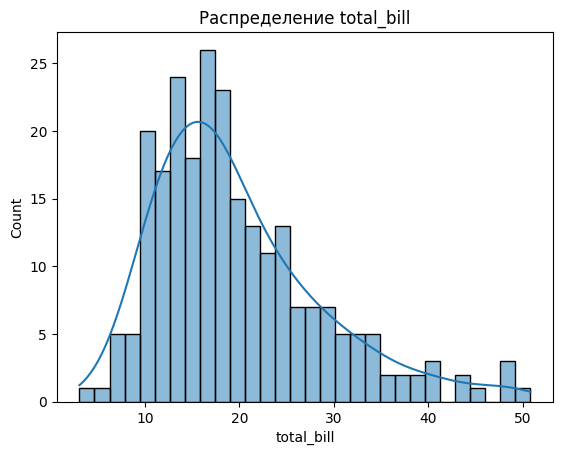

In [23]:
sns.histplot(data=tips, x='total_bill', bins=30, kde=True)
plt.title('Распределение total_bill')
plt.show()


### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

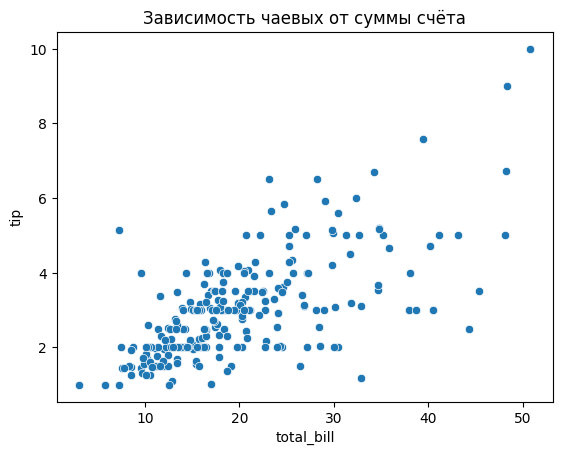

In [24]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.title('Зависимость чаевых от суммы счёта')
plt.show()


### Постройте pairplot

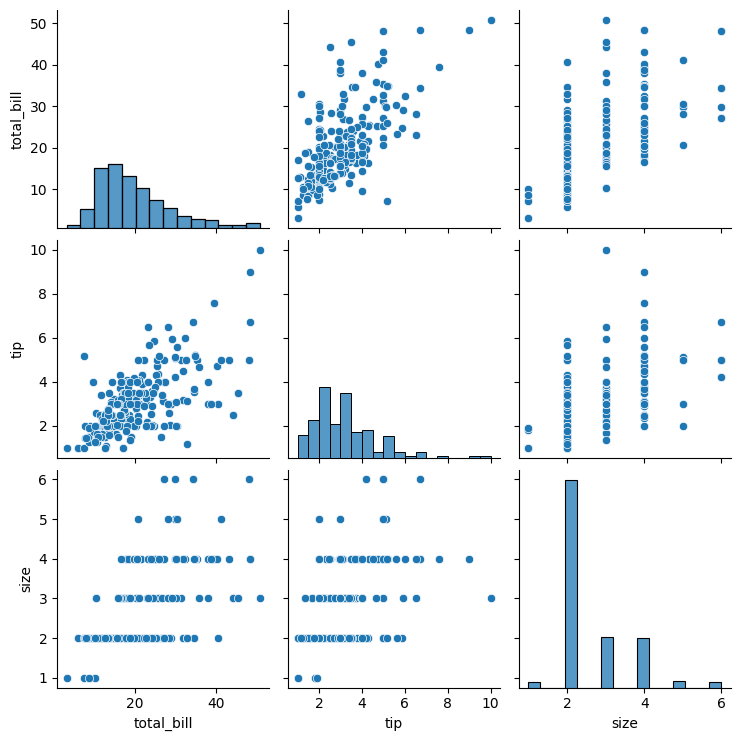

In [ ]:
sns.pairplot(tips)
plt.show()

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

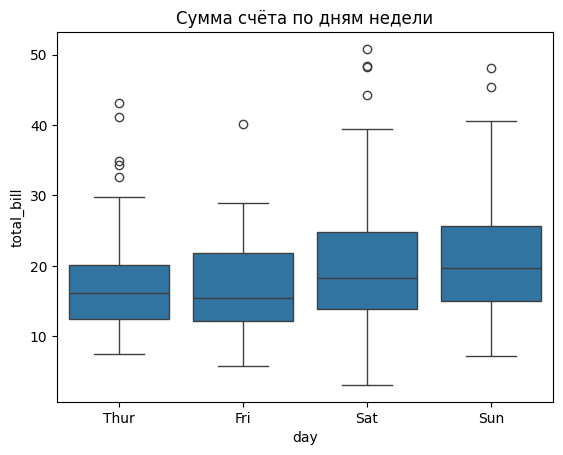

In [26]:
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('Сумма счёта по дням недели')
plt.show()


### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

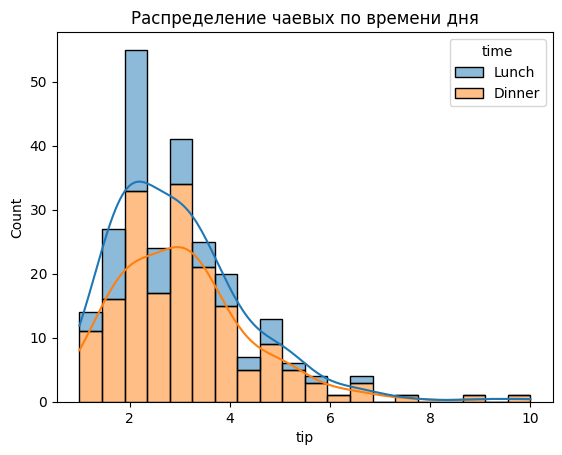

In [27]:
sns.histplot(data=tips, x='tip', hue='time', bins=20, kde=True, multiple='stack')
plt.title("Распределение чаевых по времени дня")
plt.show()


### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

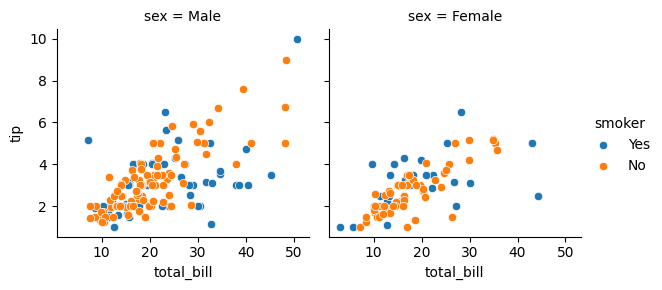

In [28]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip").add_legend()
plt.show()


## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

### 1. Гистограмма распределения total_bill

На графике видно, что:

    Большинство заказов по счёту (total_bill) укладываются в диапазон от 10 до 20 долларов.

    Распределение асимметрично вправо, то есть присутствуют редкие, но дорогие счета (до 50 долларов и выше).

    Вероятно, это говорит о том, что основная масса посетителей делала небольшие заказы, а крупные чеки — исключение.

📌 Вывод: основная часть клиентов тратит умеренные суммы, но есть группа с существенно более высокими счетами.


### 2. Scatterplot total_bill vs tip

    Видна положительная корреляция: чем выше счёт, тем больше чаевые.

    Однако разброс увеличивается: при больших чеках данные становятся менее предсказуемыми.

    Некоторые клиенты при высоком счёте оставляют относительно маленькие чаевые, а другие — щедро благодарят.

📌 Вывод: чаевые в среднем растут вместе со счётом, но отношение к чаевым зависит от других факторов (возможно, от типа клиента, дня недели или времени суток).


### 3. Pairplot (взаимосвязь всех переменных)

    total_bill и tip снова демонстрируют положительную зависимость.

    size тоже коррелирует с total_bill: чем больше людей, тем больше счёт.

    size и tip тоже коррелируют, но слабее.

📌 Вывод: логично, что большие компании приносят большие счета и чаевые. Однако на чаевые влияет не только размер группы, но и личные предпочтения.


### 4. График зависимости total_bill от day

    Больше всего заказов наблюдается в выходные — пятницу, субботу, воскресенье.

    Счета в четверг меньше и реже.

📌 Вывод: рестораны более загружены и прибыльны в выходные дни.


### 5. Гистограмма tip по time (Lunch/Dinner)

    Ужин (Dinner) сопровождается большими чаевыми в абсолютных значениях.

    Обед (Lunch) — более скромные чаевые.

📌 Вывод: клиенты вечером тратят больше и оставляют больше чаевых. Это может быть связано с общим размером счёта или с культурой поведения вечером.


### 6. Scatterplot total_bill vs tip по полу и статусу курильщика

    Мужчины и женщины демонстрируют схожую тенденцию.

    У курящих больше разброс чаевых: у них чаще встречаются как щедрые, так и маленькие чаевые при одинаковых счетах.

    У некурящих распределение чаевых более предсказуемо.

📌 Вывод: курящие клиенты ведут себя менее предсказуемо в плане чаевых, возможно, это косвенно указывает на социальные привычки или поведение.